In [3]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
root_dir = '/home/mamur/TUM/MLMI/dataset/'

## STEP 1) ANALYSIS OF MASTER FILE
In this step we analysed the given csv file and deep dive into the statistics of the dataset for classification task

In [85]:
label_df = pd.read_csv(root_dir + 'mimic-cxr-2.0.0-chexpert.csv')
label_df.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN


In [86]:
meta_df = pd.read_csv(root_dir + 'mimic-cxr-2.0.0-metadata.csv')
meta_df.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN


In [87]:
path_df = pd.read_csv(root_dir + '220112_mimic-cxr.csv')
path_df.head()

,dicom_id,study_id,subject_id,split,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,...,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,report,png_224,jpg,png_256
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,...,1.0,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s50414267...,/datasets/211207_mimic-cxr/02aa804e-bde0afdd-1...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,/datasets/220111_mimic-cxr_256/02aa804e-bde0af...
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,...,1.0,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s50414267...,/datasets/211207_mimic-cxr/174413ec-4ec4c1f7-3...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,/datasets/220111_mimic-cxr_256/174413ec-4ec4c1...
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,...,NaN,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53189527...,/datasets/211207_mimic-cxr/2a2277a9-b0ded155-c...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,/datasets/220111_mimic-cxr_256/2a2277a9-b0ded1...
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,...,NaN,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53189527...,/datasets/211207_mimic-cxr/e084de3b-be89b11e-2...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,/datasets/220111_mimic-cxr_256/e084de3b-be89b1...
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,...,NaN,NaN,NaN,NaN,NaN,NaN,/mimic-cxr/2.0.0/files/p10/p10000032/s53911762...,/datasets/211207_mimic-cxr/68b5c4b1-227d0485-9...,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,/datasets/220111_mimic-cxr_256/68b5c4b1-227d04...


In [88]:
path_df = path_df[['dicom_id', 'jpg']]

In [89]:
# return the count number of unique values in viewposition column
meta_df['ViewPosition'].value_counts()

ViewPosition
AP                147173
PA                 96161
LATERAL            82853
LL                 35133
PA LLD                 4
LAO                    3
RAO                    3
AP AXIAL               2
AP LLD                 2
XTABLE LATERAL         2
AP RLD                 2
SWIMMERS               1
PA RLD                 1
LPO                    1
Name: count, dtype: int64

For simplicty, we will use only the images from frontal view which indicated by the value of view_position with AP and PA 

In [90]:
# get the rows with PA or AP view position
meta_df = meta_df[meta_df['ViewPosition'].isin(['PA', 'AP'])]
meta_df.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN
5,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,10000032,53911762,CHEST (PORTABLE AP),AP,2906,2258,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,Erect
6,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,10000032,56699142,CHEST (PORTABLE AP),AP,3056,2544,21800805,234424.765,CHEST (PORTABLE AP),antero-posterior,NaN


In [91]:
# return the count number of unique values in viewposition column
meta_df['ViewPosition'].value_counts()

ViewPosition
AP    147173
PA     96161
Name: count, dtype: int64

Now, merge both meta_data and labels to come up with enriched dataset frame

In [92]:
merged_meta_data = pd.merge(meta_df, path_df, on='dicom_id')

In [93]:
merged_meta_data = merged_meta_data[['dicom_id', 'study_id', 'subject_id', 'jpg']]
merged_meta_data.head()

,dicom_id,study_id,subject_id,jpg
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...
3,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...
4,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5669...


In [94]:
print('Number of images with the frontal view: ', merged_meta_data.shape[0])

Number of images with the frontal view:  243334


In [95]:
# merge the label and meta data on study_id and subject_id
merged_df = pd.merge(merged_meta_data, label_df, on=['study_id', 'subject_id'])

In [96]:
merged_df

,dicom_id,study_id,subject_id,jpg,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5669...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243319,3fcd0406-9b111603-feae7033-96632b3a-111333e5,57132437,19999733,/mimic-cxr-jpg/2.0.0/files/p19/p19999733/s5713...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
243320,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,57132437,19999733,/mimic-cxr-jpg/2.0.0/files/p19/p19999733/s5713...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
243321,58766883-376a15ce-3b323a28-6af950a0-16b793bd,55368167,19999987,/mimic-cxr-jpg/2.0.0/files/p19/p19999987/s5536...,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
243322,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,58621812,19999987,/mimic-cxr-jpg/2.0.0/files/p19/p19999987/s5862...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Perfect, now we have a df that contains dicom id and also related chexpert labels

In [97]:
# return all the unique values in pathology columns columns[4:]
pathology_columns = merged_df.columns[4:]
pathology_columns


Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
       'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
       'Pneumothorax', 'Support Devices'],
      dtype='object')

In [98]:
# return the count number of unique values in each pathology column
for column in pathology_columns:
    print(column, merged_df[column].value_counts())

Atelectasis Atelectasis
 1.0    48790
-1.0    10965
 0.0     1596
Name: count, dtype: int64
Cardiomegaly Cardiomegaly
 1.0    47673
 0.0    16370
-1.0     6417
Name: count, dtype: int64
Consolidation Consolidation
 1.0    11525
 0.0     8432
-1.0     4598
Name: count, dtype: int64
Edema Edema
 1.0    29331
 0.0    25991
-1.0    14244
Name: count, dtype: int64
Enlarged Cardiomediastinum Enlarged Cardiomediastinum
-1.0    10001
 1.0     7657
 0.0     5469
Name: count, dtype: int64
Fracture Fracture
 1.0    4781
 0.0     961
-1.0     602
Name: count, dtype: int64
Lung Lesion Lung Lesion
 1.0    6632
-1.0    1192
 0.0     844
Name: count, dtype: int64
Lung Opacity Lung Opacity
 1.0    54769
-1.0     4023
 0.0     3053
Name: count, dtype: int64
No Finding No Finding
1.0    81117
Name: count, dtype: int64
Pleural Effusion Pleural Effusion
 1.0    57721
 0.0    27645
-1.0     6202
Name: count, dtype: int64
Pleural Other Pleural Other
 1.0    2083
-1.0     794
 0.0     123
Name: count, dtype: 

In [99]:
# count NaN values in each pathology column
for column in pathology_columns:
    print(column, merged_df[column].isna().sum())

Atelectasis 181973
Cardiomegaly 172864
Consolidation 218769
Edema 173758
Enlarged Cardiomediastinum 220197
Fracture 236980
Lung Lesion 234656
Lung Opacity 181479
No Finding 162207
Pleural Effusion 151756
Pleural Other 240324
Pneumonia 182358
Pneumothorax 185927
Support Devices 166106


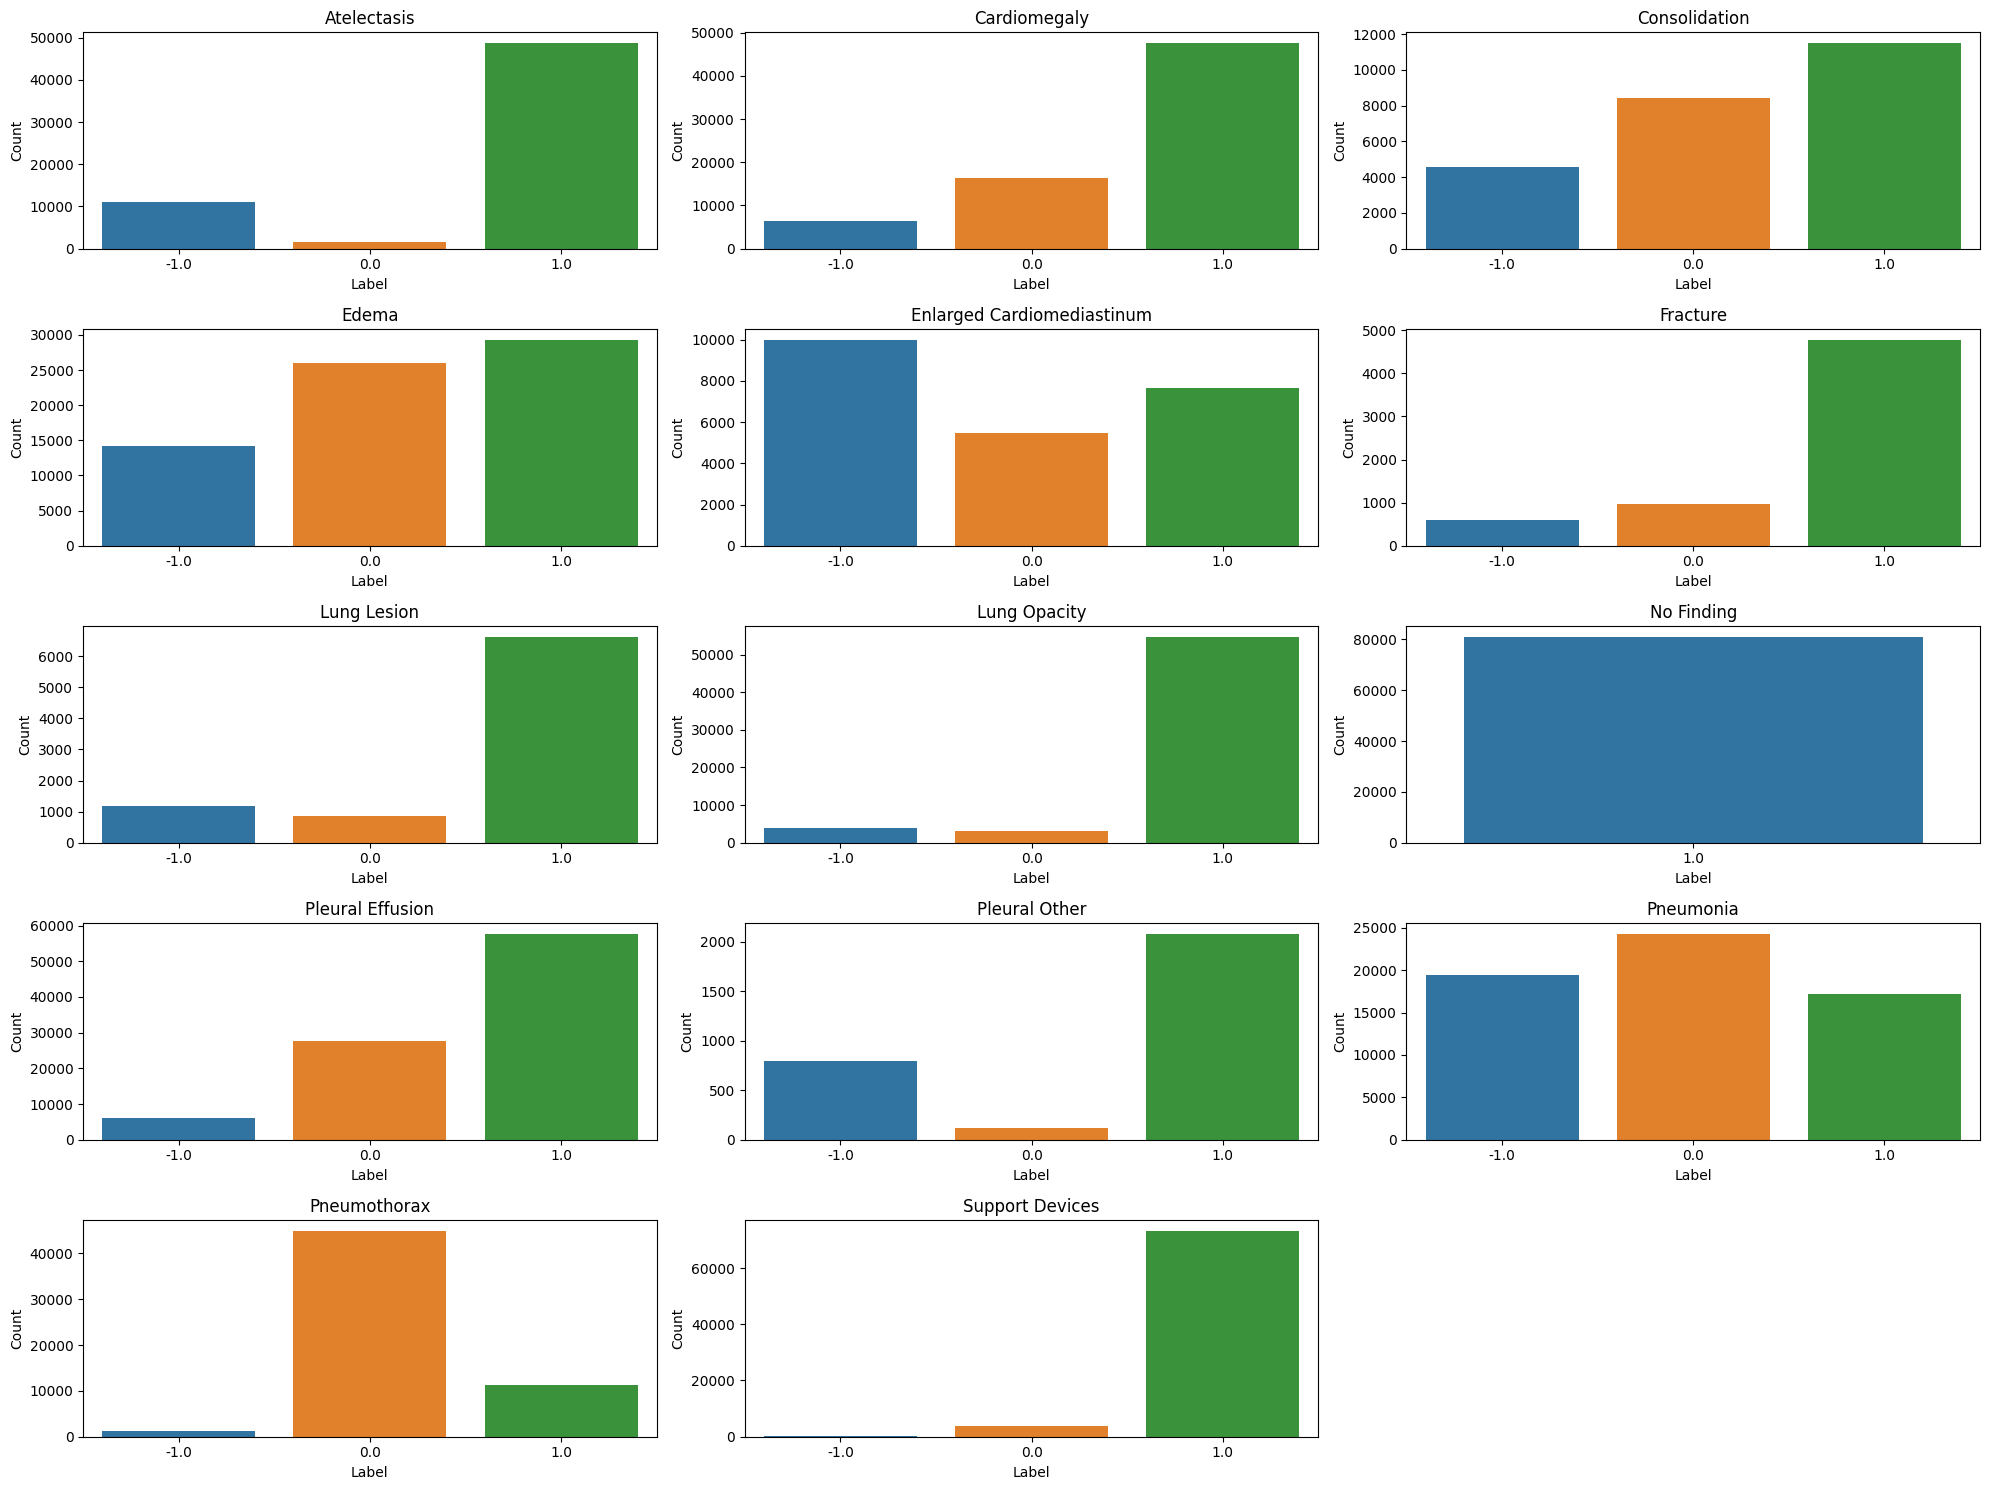

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame and pathology_columns is the list of pathology columns
pathology_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Iterate through each pathology column
for i, column in enumerate(pathology_columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size according to the number of pathologies
    value_counts = merged_df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(column)
    plt.xlabel('Label')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [101]:
# fill all NAN values with 0
# merged_df.fillna(0, inplace=True)

In [102]:
df = merged_df.copy()

In [103]:
df.columns

Index(['dicom_id', 'study_id', 'subject_id', 'jpg', 'Atelectasis',
       'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum',
       'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding',
       'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax',
       'Support Devices'],
      dtype='object')

In [105]:
# fill all NaN values with 0
df.fillna(0, inplace=True)

In [106]:
df_ones = df.copy()
# replace all -1 with 1
df_ones.replace(-1, 1, inplace=True)

In [107]:
df_zeros = df.copy()
# replace all -1 with 0
df_zeros.replace(-1, 0, inplace=True)

In [108]:
df.to_csv(root_dir + 'master_df.csv', index=False)

In [109]:
df_ones.to_csv(root_dir + 'master_df_ones.csv', index=False)

In [110]:
df_zeros.to_csv(root_dir + 'master_df_zeros.csv', index=False)

In [112]:
df_zeros

,dicom_id,study_id,subject_id,jpg,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5669...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243319,3fcd0406-9b111603-feae7033-96632b3a-111333e5,57132437,19999733,/mimic-cxr-jpg/2.0.0/files/p19/p19999733/s5713...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243320,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,57132437,19999733,/mimic-cxr-jpg/2.0.0/files/p19/p19999733/s5713...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243321,58766883-376a15ce-3b323a28-6af950a0-16b793bd,55368167,19999987,/mimic-cxr-jpg/2.0.0/files/p19/p19999987/s5536...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243322,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,58621812,19999987,/mimic-cxr-jpg/2.0.0/files/p19/p19999987/s5862...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [113]:
df_ones

,dicom_id,study_id,subject_id,jpg,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5041...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5318...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5391...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,/mimic-cxr-jpg/2.0.0/files/p10/p10000032/s5669...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243319,3fcd0406-9b111603-feae7033-96632b3a-111333e5,57132437,19999733,/mimic-cxr-jpg/2.0.0/files/p19/p19999733/s5713...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243320,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,57132437,19999733,/mimic-cxr-jpg/2.0.0/files/p19/p19999733/s5713...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243321,58766883-376a15ce-3b323a28-6af950a0-16b793bd,55368167,19999987,/mimic-cxr-jpg/2.0.0/files/p19/p19999987/s5536...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243322,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,58621812,19999987,/mimic-cxr-jpg/2.0.0/files/p19/p19999987/s5862...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Fill wıth 1s 

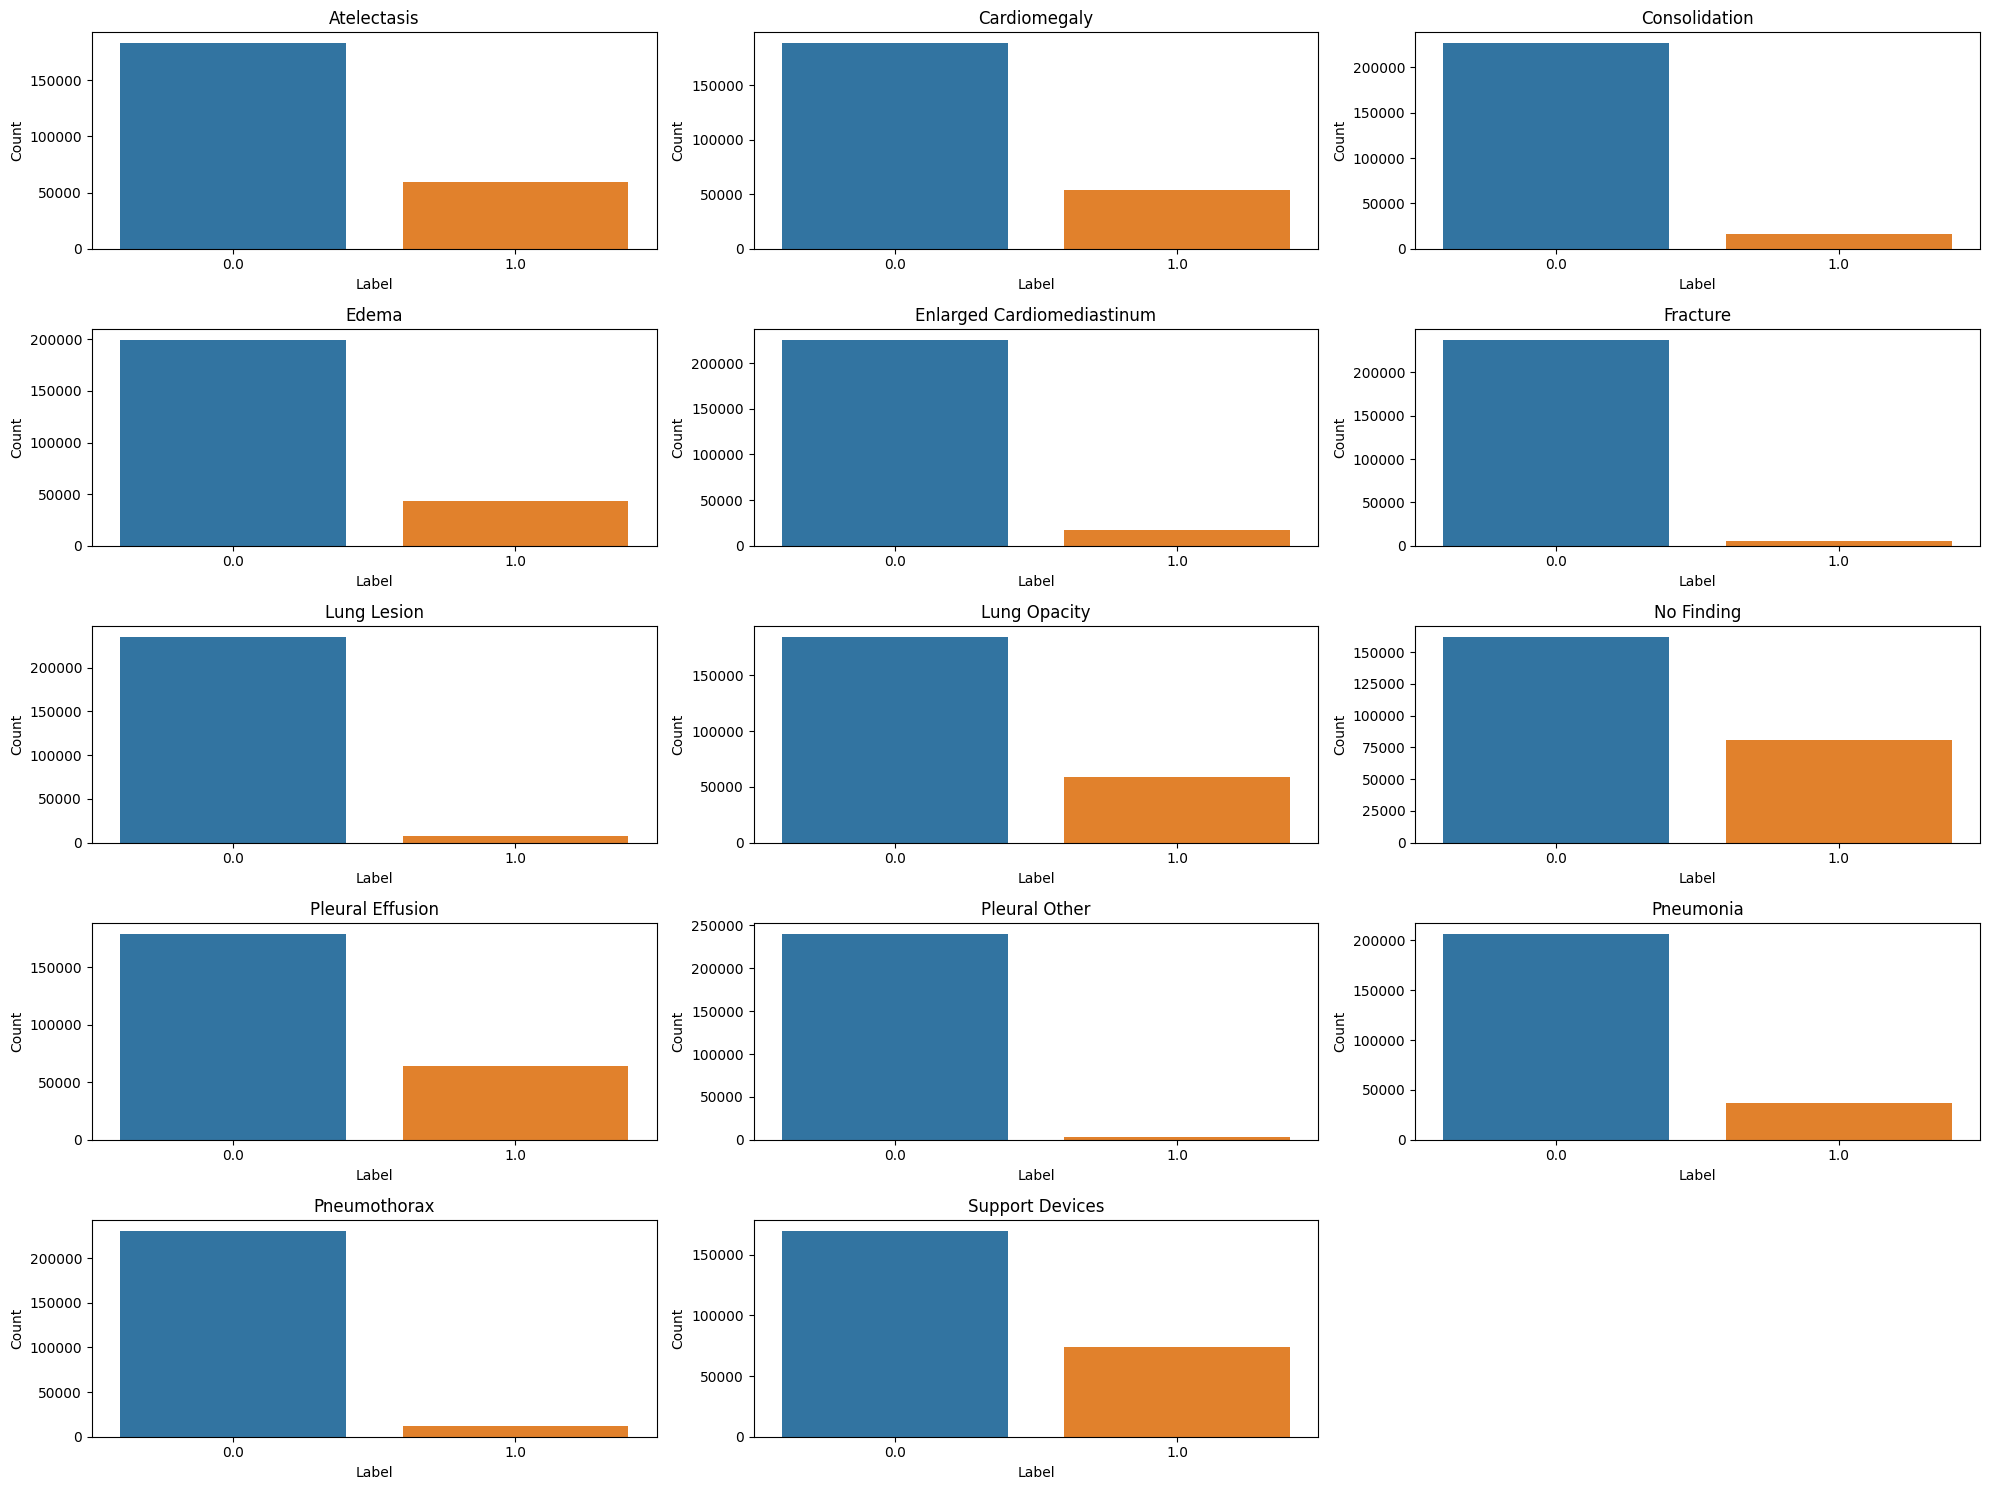

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame and pathology_columns is the list of pathology columns
pathology_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Iterate through each pathology column
for i, column in enumerate(pathology_columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size according to the number of pathologies
    value_counts = df_ones[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(column)
    plt.xlabel('Label')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Fill with 0s

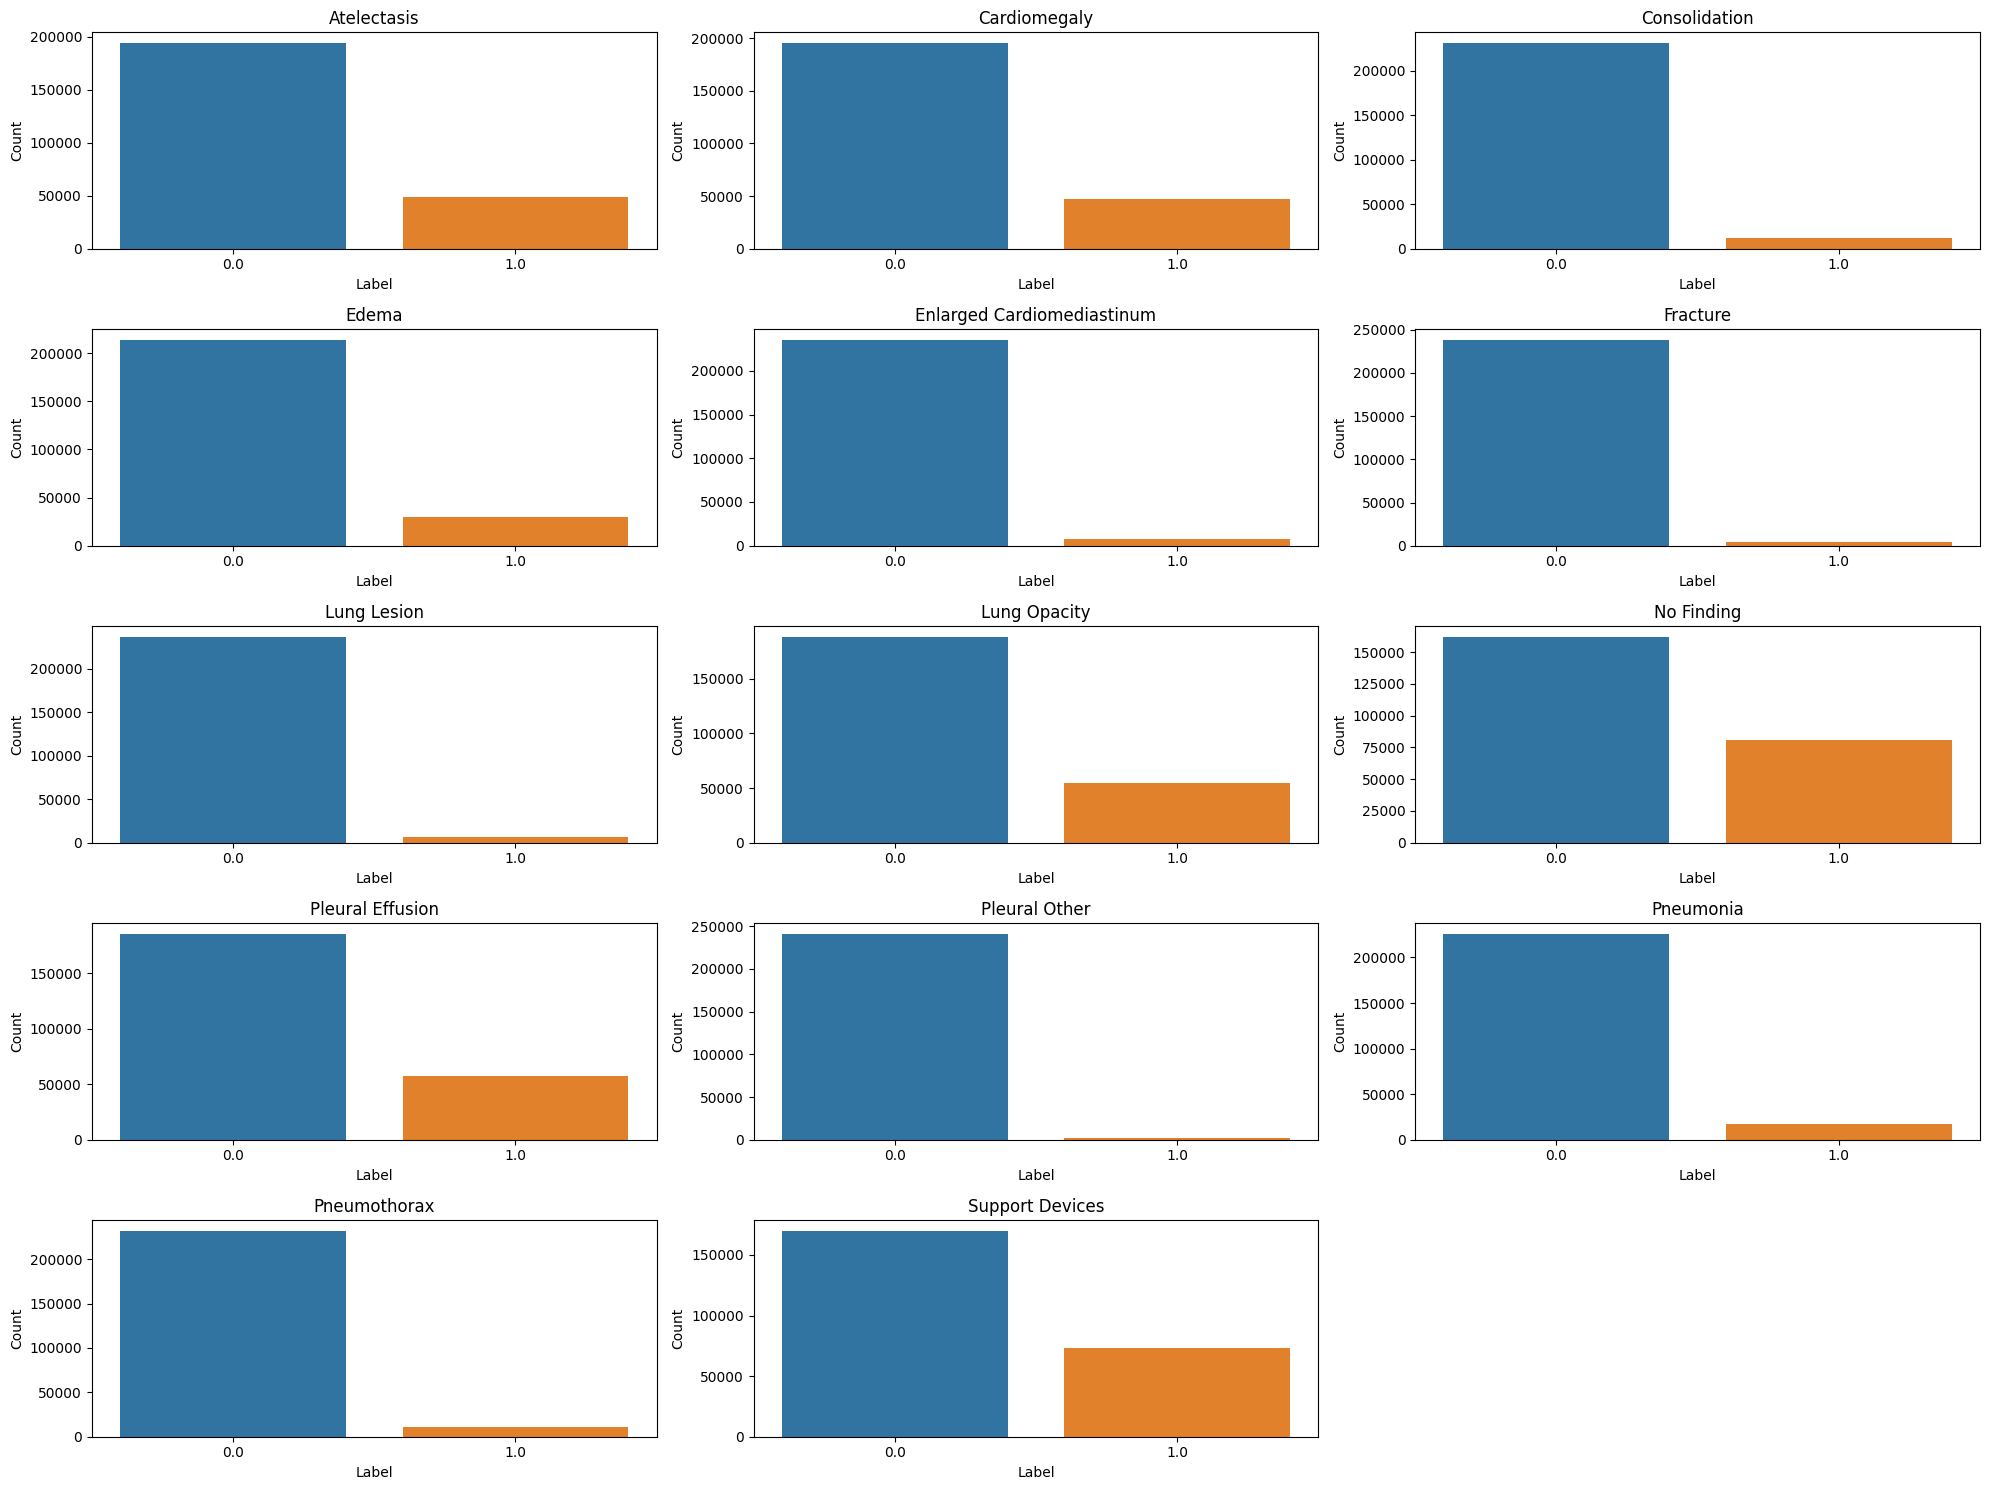

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame and pathology_columns is the list of pathology columns
pathology_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Iterate through each pathology column
for i, column in enumerate(pathology_columns, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size according to the number of pathologies
    value_counts = df_zeros[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(column)
    plt.xlabel('Label')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [1]:
import sys
sys.path.append("../")
from src.utils.utils import read_config

In [2]:
from src.utils.environment_settings import env_settings
opt = read_config(env_settings.CONFIG)

In [3]:
from src.utils._prepare_data import DataHandler

/home/mamur/miniconda3/envs/adlm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
processor = DataHandler(opt["dataset"])

In [5]:
records = processor.create_records()

Index(['jpg'], dtype='object')


In [7]:
records[0]

{'img': '/mimic-cxr-jpg/2.0.0/files/p19/p19777911/s59006486/8a54746d-9e18cc8c-7ff18e2e-fc4156d5-40c22aee.jpg',
 'label': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])}